# Logistic Regression

## Data Preprocessing

In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Set working directory
month_file = '2_June'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

In [16]:
# Load original dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet')

print(dataset.columns)

Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 'w/g',
       'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws',
       '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt',
       '2ws/min', '3ws/min', '4ws/min', 'ave_time_per_gamble',
       'min_time_per_gamble', 'max_time_per_gamble', 'total_duration',
       'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
       'unique_machines', 'ave_time_

## Load Dataframes

In [17]:
# Filter Columns
filter = ['session_time', 'gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 'ave_time_per_gamble', 
        'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'classification']

# Columns NOT INCLUDED
# 'playerkey', 'rank', 'age_range', '#W', '#L', '#NH', '#D', #2ws, #3ws, #4ws, 2ws_profit, 3ws_profit, 4ws_profit,
# 2ws_wgramt, 3ws_wgramt, 4ws_wgramt, ave_time_per_machine, 'total_duration', 'total_gambles'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)


# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Taking Care of Missing Data

X[:, 3:31] it covers from beggining account balance to 4ws_wgramt column

We do not need this step since we do not have missing data!

In [18]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 3:31])
# X[:, 3:31] = imputer.transform(X[:, 3:31])

## Encoding Categorical Data

### Encoding the Independent Variable

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender and simplay
X[:, 0] = le.fit_transform(X[:, 0])

In [20]:
# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Encoding the Dependent Variable

In [21]:
y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])

## Training the Logistic Regression model on 

1.   X_train
2.   y_train

the Training set

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Which IDVs have the most weight in the model

In [25]:
# Get the feature names after one-hot encoding
feature_names = ct.get_feature_names_out()

# Get the coefficients and feature importance
coefficients = classifier.coef_[0]
feature_importance = list(zip(feature_names, coefficients))

# Sort the feature importance by absolute coefficient values
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

remainder__x24: 1.523974515757369
remainder__x42: -0.8309524685836367
remainder__x44: 0.7911089744718807
remainder__x37: 0.769406543472371
remainder__x36: 0.6771180407166123
remainder__x23: -0.5663015885732684
remainder__x15: -0.5137887468202462
remainder__x45: 0.4991921737756316
encoder__x2_draw: -0.4764582039393041
remainder__x31: 0.45640720450826683
encoder__x5_draw: -0.4458982166332486
encoder__x5_loss: 0.4139723139885646
remainder__x27: 0.3947864661156677
remainder__x39: 0.37981464825917344
remainder__x46: 0.3587178933052631
encoder__x2_gain: 0.3419963535174383
remainder__x3: -0.34032144587699215
remainder__x41: -0.30997684936701997
remainder__x6: 0.3049684729269822
remainder__x0: 0.28916085460817537
remainder__x30: 0.28213975105567374
remainder__x16: 0.2760787789982095
remainder__x22: 0.2625139049529847
remainder__x35: 0.25171192596207026
remainder__x33: -0.23685147228400644
remainder__x21: 0.229643255718016
encoder__x1_Gen X: 0.21766418868803722
remainder__x28: 0.216293964169108

In [26]:
from sklearn.inspection import permutation_importance

result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

remainder__x24: 0.13849765258215957
remainder__x44: 0.1183098591549295
remainder__x17: 0.10845070422535208
remainder__x15: 0.10234741784037556
remainder__x23: 0.08685446009389666
remainder__x36: 0.08309859154929575
remainder__x40: 0.07652582159624408
remainder__x39: 0.0708920187793427
remainder__x37: 0.0690140845070422
remainder__x42: 0.05962441314553988
remainder__x31: 0.056338028169014044
encoder__x5_near-hit: 0.04413145539906098
encoder__x5_gain: 0.041784037558685413
remainder__x35: 0.041784037558685413
encoder__x5_loss: 0.041314553990610306
remainder__x46: 0.03615023474178399
remainder__x41: 0.030985915492957695
remainder__x32: 0.02629107981220654
remainder__x7: 0.02629107981220652
remainder__x30: 0.025821596244131394
remainder__x16: 0.025352112676056304
remainder__x38: 0.02488262910798118
remainder__x22: 0.02206572769953049
remainder__x34: 0.021126760563380243
encoder__x1_Silent: 0.02065727699530512
remainder__x0: 0.019718309859154893
remainder__x8: 0.017840375586854428
remainder_

### Predicting the Test set results

In [27]:
y_pred = classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [0 0]
 [1 2]
 [2 0]
 [1 0]
 [2 0]
 [0 2]
 [0 0]
 [1 1]
 [3 2]
 [2 3]
 [2 2]
 [1 3]
 [3 3]
 [2 2]
 [1 3]
 [1 1]
 [1 2]
 [0 0]
 [3 2]
 [0 0]
 [0 0]
 [3 3]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [2 3]
 [0 1]
 [1 2]
 [3 2]
 [2 0]
 [3 3]
 [1 0]
 [2 3]
 [0 1]
 [3 2]
 [2 2]
 [0 0]
 [3 1]
 [3 2]
 [2 1]
 [3 2]
 [2 1]
 [1 0]
 [0 2]
 [0 1]
 [0 0]
 [3 1]
 [3 3]
 [1 0]
 [3 3]
 [0 1]]


### Making the Confusion Matrix and Accuracy Score

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

# Interpretation of confusion matrix
print('True Positive (B20): ', cm[0][0])
print('True Negative (T20): ', cm[1][1])
print('False Positive: ', cm[0][1])
print('False Negative: ', cm[1][0])

[[7 6 3 0]
 [4 3 3 2]
 [2 3 5 6]
 [0 2 3 5]]
Accuracy:  0.37037037037037035
Precision:  0.37362637362637363
Recall:  0.375
F1 Score:  0.37041094837196786
True Positive (B20):  7
True Negative (T20):  3
False Positive:  6
False Negative:  4


## Cumulative Accuracy Profile (CAP) Graph

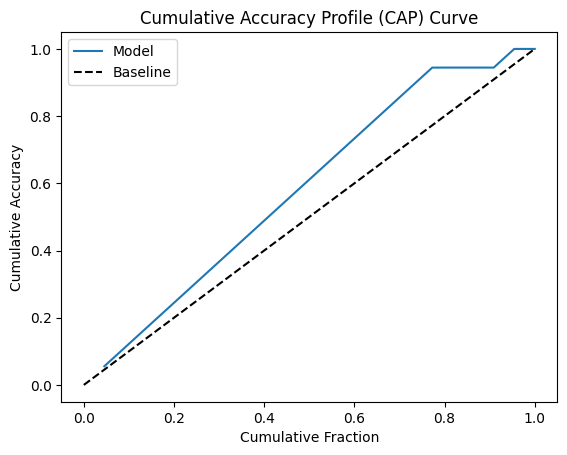

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()